### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into new year. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In this year, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Supermarket-January-2017.xlsx) or you can just use this link https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Supermarket-January-2017.xlsx. It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

#### Scoring Rubric (Total 100 points)




1.   Class Attendance: 0 / 10

2.   On-time Submission:  0 / 10

3.   EDA Quality & Visualisations:
*   Correct loading and checking of data: 0 / 5
*   Meaningful descriptive stats: 0 / 5
*   At least 2 clear plots with short interpretations: 0 / 5 / 10

4.   Data Preprocessing & Basket Creation
*   Proper column selection and cleaning decisions explained: 0 / 10
*   Correct aggregation to transaction level and one-hot encoding: 0 / 10

5.   ARM Implementation (Apriori Rules)
*   Correct use of apriori() with appropriate min_support values: 0 / 10
*   Correct use of association_rules() with appropriate filtering: 0 / 10

6.   Insights & Business Recommendations
*   Interpretation of rules: 0 / 10
*   Realistic managerial actions:  0 / 10

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    module="jupyter_client.session"
)

!pip install mlxtend==0.23.1

In [5]:
# load the data set ans show the first five transaction
df = pd.read_excel("Supermarket-January-2017.xlsx")
df.head()

c:\Users\celin\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\celin\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

NO BKT and ITEM is safe, no non-null value

In [7]:
df.isnull().sum()

KD_SBR           3
TP_TRN           3
KDSUP       107657
KAS          12195
TRN_DK           3
             ...  
TP_ADJ        9413
USER             3
TANGGAL          3
JAM              3
LAMA_CRD    148452
Length: 61, dtype: int64

In [8]:
df.describe()

,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,TGL_TRANS,NO_ORD,SLD_AK,SLD_AKG,...,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,TANGGAL,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,148486,0.0,11769.000000,9350.000000,...,0.0,0.0,0.0,0.0,8847,1.484860e+05,7264.000000,1668.000000,148486,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,2017-01-15 21:02:24.159045376,NaN,20.819228,15.819209,...,NaN,NaN,NaN,NaN,2016-12-07 05:29:26.429297920,1.717615e+11,313.185573,1.182854,2017-01-15 21:34:32.486295296,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,2017-01-01 00:00:00,NaN,-12.000000,-12.000000,...,NaN,NaN,NaN,NaN,2013-09-24 00:00:00,1.701010e+11,0.000000,1.000000,2017-01-01 00:00:00,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,2017-01-07 00:00:00,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,1.701077e+11,8.000000,1.000000,2017-01-07 00:00:00,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,2017-01-15 00:00:00,NaN,3.000000,2.000000,...,NaN,NaN,NaN,NaN,2016-12-22 00:00:00,1.701160e+11,69.000000,1.000000,2017-01-16 00:00:00,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,2017-01-25 00:00:00,NaN,13.000000,11.000000,...,NaN,NaN,NaN,NaN,2017-01-05 00:00:00,1.701251e+11,444.000000,1.000000,2017-01-25 00:00:00,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,2017-01-31 00:00:00,NaN,2663.000000,1748.000000,...,NaN,NaN,NaN,NaN,2017-01-31 00:00:00,7.013157e+11,1769.000000,2.000000,2017-02-01 00:00:00,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,NaN,70.033381,54.576439,...,NaN,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,NaN,0.0


#### EDA

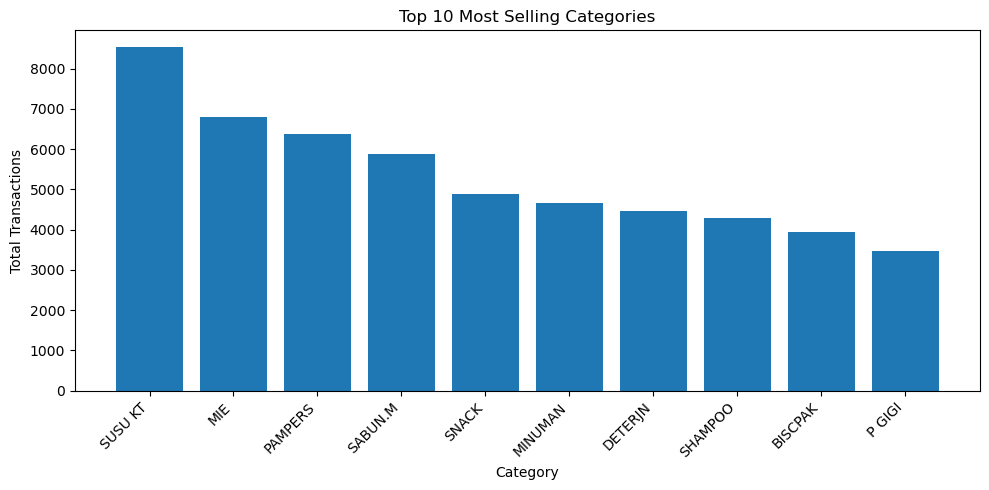

In [12]:
top10 = (
    df["KEL"]
    .value_counts()
    .head(10)
    .reset_index()
)

top10.columns = ["KEL", "count"]

plt.figure(figsize=(10,5))
plt.bar(top10["KEL"], top10["count"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Category")
plt.ylabel("Total Transactions")
plt.title("Top 10 Most Selling Categories")
plt.tight_layout()
plt.show()


From the chart we can see the top 10 most selling categories, where "SUSU KT" or milk has the highest total transaction (reaching up to 8000) following with MIE (noodles) and PAMPERS. This shows that these products are bought the most by customers and a have steady demand, so the store should keep enough stock, refill them more often, and consider making promotions for these high-selling categories.

C:\Users\celin\AppData\Local\Temp\ipykernel_14264\514028551.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10["week"] = df_top10["TGL_TRANS"].dt.to_period("W").astype(str)


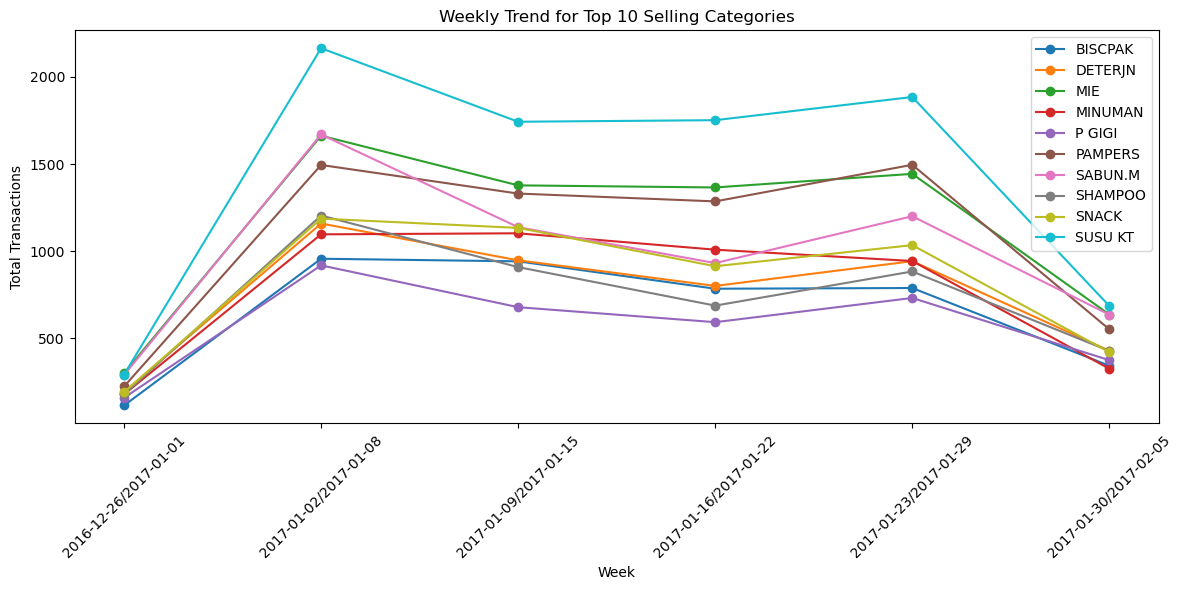

In [16]:
df["TGL_TRANS"] = pd.to_datetime(df["TGL_TRANS"])
top10 = df["KEL"].value_counts().head(10).index
df_top10 = df[df["KEL"].isin(top10)]

df_top10["week"] = df_top10["TGL_TRANS"].dt.to_period("W").astype(str)


weekly = (
    df_top10.groupby(["week", "KEL"])
            .size()
            .reset_index(name="count")
)
plt.figure(figsize=(12,6))

for cat in weekly["KEL"].unique():
    subset = weekly[weekly["KEL"] == cat]
    plt.plot(subset["week"], subset["count"], marker="o", label=cat)

plt.xlabel("Week")
plt.ylabel("Total Transactions")
plt.title("Weekly Trend for Top 10 Selling Categories")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

From the chart we can see a weekly trend for the top 10 most selling categories, starting the first week, category SUSU has the highest sales up to 2000 transaction a week following with SABUN and MIE. But starting week 2, amount of transaction starts to drop, then increase a bit again on the last week. This suggests that most customers tend to buy more at the beginning of the week and again toward the end of the week.

###  Data Preprocessing & Basket Creation

In [23]:
from mlxtend.preprocessing import TransactionEncoder
baskets = df.groupby("NO_BKT")["NAMA"].apply(list)
te = TransactionEncoder()
te_array = te.fit_transform(baskets.tolist())

df_encoded = pd.DataFrame(te_array, columns=te.columns_)

Choose only column NO_BKT to group all items purchased together into the same basket. and NAMA to to get the name of the item

In [24]:
df_encoded

,4 RACK MILK POWDER COUN 08-022,A.M MADU BALITA 150ML,A.M MADU LENGKENG 250ML,A.M MADU SUPER LENGKENG 625ML,A.M ROYAL JELLY 150ML AUSTRALI,A.M ROYAL JELLY 250M,A.M ROYAL JELLY 250ML AUSTRALI,A.T.B MARIE SUSU 185GR,ABC 9 VOLT,ABC ALKALINE A2 LR-0,...,ZWITSAL POWDER 100GR EX C.ZINC,ZWITSAL POWDER 300GR,ZWITSAL POWDER 300GR EX.CARE,ZWITSAL POWDER 300GR NAT ML&HN,ZWITSAL POWDER 300GR SF.FLORAL,ZWITSAL POWDER 500GR BOUNTY FF,ZYLUC BLACK CRACK 45G COKLAT,ZYLUC BLACK CRACK 45G ORANGE,ZYLUC BLACK CRACK 45G TIRAMISU,ZYLUC STICK 45GR CHO
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36583,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
36584,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
36585,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
36586,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### ARM

In [39]:
#Set threshold value untuk digunakan dalam penghitungan support
from mlxtend.frequent_patterns import apriori, association_rules
df_apriori = apriori(df_encoded, min_support = 0.003, use_colnames = True)
df_apriori

,support,itemsets
0,0.004619,(ANGPAO PDK/[M] [GOLDEN.S])
1,0.004400,(AQUA 1500ML)
2,0.007789,(AQUA 600 ML)
3,0.004920,(BALON TIUP 777 [10PC])
4,0.003498,(BANGO KECAP RF 600ML)
...,...,...
93,0.003772,(ULTRA MILK 250ML COKLAT)
94,0.003280,(VANISH RF 450ML)
95,0.015224,(YAKULT ISI 5)
96,0.003170,(YOU C1000 140ML ORANGE)


We use min support 0.003 because it is low enough to capture items that are bought together so Apriori is able to find real item combinations instead of only single items.

In [42]:
rules = association_rules(df_apriori, metric="confidence", min_threshold=0.003)
rules = rules[rules["lift"] > 1]
rules.sort_values(by="lift", ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(MIE INDOMIE GORENG 84GR),(MIE INDOMIE KARI AYAM),0.020280,0.007543,0.003881,0.191375,25.369624,0.003728,1.227338,0.980467
1,(MIE INDOMIE KARI AYAM),(MIE INDOMIE GORENG 84GR),0.007543,0.020280,0.003881,0.514493,25.369624,0.003728,2.017931,0.967884


#### Interpretation of Rules

Rule 1: MIE INDOMIE GORENG 84GR -> MIE INDOMIE KARI AYAM
Customers who buy Indomie Goreng 84gr are 25 times more likely to also buy Indomie Kari Ayam (lift = 25.369624). Although this occurs in a small portion of total transactions (support 0.388%), the strength of the association is extremely high. 

Rule 2: MIE INDOMIE KARI AYAM -> MIE INDOMIE GORENG 84GR
Customers who buy Indomie Kari Ayam have a 51% probability of also purchasing Indomie Goreng 84gr (confidence = 0.514493). Rule 2 has a much stronger confidence then Rule 1. This means buyers of Kari Ayam are even more likely to also choose Goreng.

#### Manegerial Actions

1) Store layout and shelf placement
- Position the two Indomie variants side-by-side or within the same eye-level shelf segment.
- Ensure stock availability for both variants simultaneously, as out-of-stock on one item may reduce sales of the other.

2) Bundling and promotion opportunities
- Introduce an “Indomie Duo Pack” (Goreng + Kari Ayam) at a small discount.
- Offer cross-coupons, such as:
- Buy Indomie Goreng, get a discount on Kari Ayam
- Buy any Indomie variant, get a “Mix & Match Flavour Pack” deal
- Use special displays around peak demand periods (weekends, end-of-month salary weeks).

These promotions reinforce natural buying behavior rather than forcing new patterns, increasing conversion rates.

3) Recommendation systems (online, mobile app, or loyalty program)
- When a customer adds Indomie Goreng to basket, recommend Indomie Kari Ayam, and vice versa.
- Highlight a “Top Flavor Pairs” section on e-commerce pages.
- Provide targeted notifications: “Customers who bought Indomie Goreng also frequently buy Indomie Kari Ayam.”

Because the items already appear frequently together, these recommendations will feel relevant and increase average basket value without appearing pushy.